In [1]:
import seaborn as sns, pandas as pd, numpy as np

In [2]:
data = pd.read_csv("data/classdata-fixed.csv")

In [3]:
data = data.drop( 'Unnamed: 0', axis='columns')

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
cols= ['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc']
data[cols] = sc.fit_transform(data[cols])

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
feature_cols = data.columns[:-1]
from sklearn.model_selection import StratifiedShuffleSplit

strat_shuf_split = StratifiedShuffleSplit(n_splits=1,
                                         test_size=0.3,
                                         random_state=13)

train_idx, test_idx = next(strat_shuf_split.split(data[feature_cols], data.fault))

X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'fault']

X_test = data.loc[test_idx, feature_cols]
y_test = data.loc[test_idx, 'fault']

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [8]:
# try K=1 through K=30 and record testing accuracy
k_range = list(range(1, 10))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Testing Accuracy')

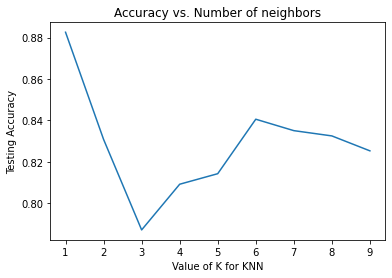

In [9]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt
# allow plots to appear within the notebook
%matplotlib inline
# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.title('Accuracy vs. Number of neighbors')
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')